In [1]:
#Script to obtain data 
from helpers import *
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries to create the multiclass model
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.utils import np_utils
# Import tensorflow and disable the v2 behavior and eager mode
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()
# from scikeras.wrappers import KerasClassifier, KerasRegressor


#Library to validate the model
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

print('Chalu hai bhai')

Instructions for updating:
non-resource variables are not supported in the long term
Chalu hai bhai


In [2]:
df = pd.read_csv("data/data_moods.csv")
df.head(5)

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [3]:
col_features = df.columns[6:-3]
X= MinMaxScaler().fit_transform(df[col_features])
X2 = np.array(df[col_features])
Y = df['mood']

In [4]:
#Encodethe categories
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)


#Convert to  dummy (Not necessary in my case)
dummy_y = np_utils.to_categorical(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=35)

target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [5]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [6]:
#Configure the model
estimator = KerasClassifier(build_fn=base_model,epochs=200,batch_size=150,verbose=1)
# estimator.model.save('C:\Users\hp\Desktop\Mini Jugad\Spotify-Machine-Learning\model.h5')

C:\Users\hp\AppData\Local\Temp\ipykernel_4588\1193559090.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=base_model,epochs=200,batch_size=150,verbose=1)


In [7]:
#Evaluate the model using KFold cross validation
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

Train on 617 samples
Epoch 1/200
617/617 [==============================] - 0s 285us/sample - loss: 1.4113 - acc: 0.4797
Epoch 2/200
617/617 [==============================] - 0s 13us/sample - loss: 1.3946 - acc: 0.4862
Epoch 3/200
617/617 [==============================] - 0s 16us/sample - loss: 1.3791 - acc: 0.4959
Epoch 4/200
617/617 [==============================] - 0s 26us/sample - loss: 1.3648 - acc: 0.4976
Epoch 5/200
617/617 [==============================] - 0s 26us/sample - loss: 1.3520 - acc: 0.4959
Epoch 6/200
617/617 [==============================] - 0s 30us/sample - loss: 1.3392 - acc: 0.4943
Epoch 7/200
617/617 [==============================] - 0s 13us/sample - loss: 1.3276 - acc: 0.4943
Epoch 8/200
617/617 [==============================] - 0s 14us/sample - loss: 1.3166 - acc: 0.4943
Epoch 9/200
617/617 [==============================] - 0s 13us/sample - loss: 1.3060 - acc: 0.4959
Epoch 10/200
617/617 [==============================] - 0s 13us/sample - loss: 1.2960 -

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 617 samples
Epoch 1/200
617/617 [==============================] - 0s 127us/sample - loss: 1.3946 - acc: 0.1750
Epoch 2/200
617/617 [==============================] - 0s 26us/sample - loss: 1.3861 - acc: 0.1912
Epoch 3/200
617/617 [==============================] - 0s 0s/sample - loss: 1.3784 - acc: 0.2139
Epoch 4/200
617/617 [==============================] - 0s 13us/sample - loss: 1.3710 - acc: 0.2318
Epoch 5/200
617/617 [==============================] - 0s 8us/sample - loss: 1.3635 - acc: 0.2512
Epoch 6/200
617/617 [==============================] - 0s 13us/sample - loss: 1.3563 - acc: 0.2609
Epoch 7/200
617/617 [==============================] - 0s 18us/sample - loss: 1.3491 - acc: 0.2853
Epoch 8/200
617/617 [==============================] - 0s 18us/sample - loss: 1.3419 - acc: 0.3306
Epoch 9/200
617/617 [==============================] - 0s 12us/sample - loss: 1.3349 - acc: 0.3647
Epoch 10/200
617/617 [==============================] - 0s 12us/sample - loss: 1.3277 - ac

In [8]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test)


Train on 548 samples
Epoch 1/200
548/548 [==============================] - 0s 146us/sample - loss: 1.4561 - acc: 0.1953
Epoch 2/200
548/548 [==============================] - 0s 21us/sample - loss: 1.4442 - acc: 0.1916
Epoch 3/200
548/548 [==============================] - 0s 29us/sample - loss: 1.4334 - acc: 0.1898
Epoch 4/200
548/548 [==============================] - 0s 15us/sample - loss: 1.4228 - acc: 0.1898
Epoch 5/200
548/548 [==============================] - 0s 22us/sample - loss: 1.4131 - acc: 0.2080
Epoch 6/200
548/548 [==============================] - 0s 15us/sample - loss: 1.4033 - acc: 0.2208
Epoch 7/200
548/548 [==============================] - 0s 29us/sample - loss: 1.3948 - acc: 0.2263
Epoch 8/200
548/548 [==============================] - 0s 14us/sample - loss: 1.3860 - acc: 0.2299
Epoch 9/200
548/548 [==============================] - 0s 28us/sample - loss: 1.3779 - acc: 0.2245
Epoch 10/200
548/548 [==============================] - 0s 15us/sample - loss: 1.3692 -

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


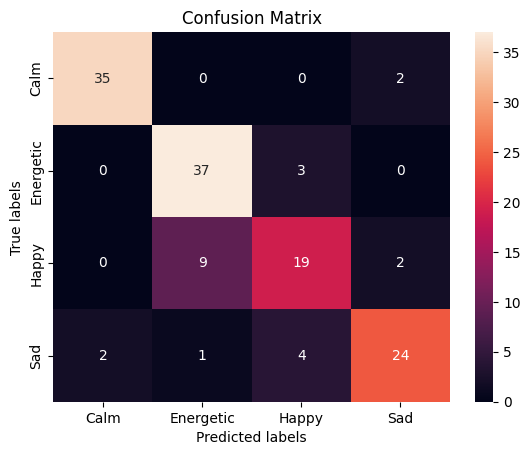

Accuracy Score 0.8333333333333334


In [9]:

cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [10]:
# Save the model to a file named "my_model.h5" in the desired location
# estimator.model.save('my_model.h5')

In [11]:
def predict_mood(id_song):
    #Join the model and the scaler in a Pipeline
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
                                                                             batch_size=200,verbose=0))])
    #Fit the Pipeline
    pip.fit(X2,encoded_y)

    #Obtain the features of the song
    preds = get_songs_features(id_song)
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pip.predict(preds_features)

    mood = np.array(target['mood'][target['encode']==int(results)])
    name_song = preds[0][0]
    artist = preds[0][2]

    return print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
    #print(f"{name_song} by {artist} is a {mood[0].upper()} song")
    

In [12]:
predict_mood('1vxw6aYJls2oq3gW0DujAo')

C:\Users\hp\AppData\Local\Temp\ipykernel_4588\1381044719.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,


Crazy by Gnarls Barkley is a HAPPY song


C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [13]:
def classify_frequency(frequency):
    mood_ranges = {'Sad': (10, 150),
                   'Calm': (150, 300),
                   'Happy': (300, 500),
                   'Energetic': (500, 700)}
    for mood, freq_range in mood_ranges.items():
        if frequency >= freq_range[0] and frequency < freq_range[1]:
            return mood
    return 'Unknown Mood'

mood = classify_frequency(179)
print(mood)

Calm


In [14]:
import random
def find_song_by_mood(df, mood):
    """
    Given a pandas DataFrame and a mood, returns the song associated with that mood.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing information about songs and their associated mood.
    mood (str): The mood to search for.
    
    Returns:
    list: A list of song names associated with the specified mood, or an empty list if no songs are found.
    """
    song_list = []
    for i in range(len(df)):
        if df['mood'][i] == mood:
            song = {'name': df['name'][i],
                    'artist': df['artist'][i],
                    'album': df['album'][i]}
            song_list.append(song)
    
    random_songs = random.sample(song_list, 10)
    return random_songs


find_song_by_mood(df,mood)

[{'name': 'Ambre', 'artist': 'Nils Frahm', 'album': 'Wintermusik'},
 {'name': 'What Should Have Been',
  'artist': 'Ron Verboom',
  'album': 'What Should Have Been'},
 {'name': 'Coda', 'artist': 'Jakob Ahlbom', 'album': 'Endeavour'},
 {'name': 'Empty Street at Night',
  'artist': 'Golden Sleep',
  'album': 'Empty Street at Night'},
 {'name': 'Remains', 'artist': 'Dries Beheydt', 'album': 'Remains'},
 {'name': 'mellow', 'artist': 'cloudcrush', 'album': 'sleep escape'},
 {'name': 'Essential Attitudes', 'artist': 'Peals', 'album': 'Honey'},
 {'name': 'Event Horizon', 'artist': 'Airwaves', 'album': 'Event Horizon'},
 {'name': 'Colgando', 'artist': 'Barulinho', 'album': 'Siesta'},
 {'name': 'Images', 'artist': 'DeLange', 'album': 'Images'}]